In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from networkx import grid_graph

In [2]:
def simulate_CCA(G, init_state, kappa, threshold=1, iters=10):
    state_matrix = init_state
    curr_state = init_state
    next_state = np.zeros(G.number_of_nodes())

    for i in range(iters):
        if i != 0:
            curr_state = next_state
            state_matrix = np.vstack((state_matrix, next_state))

        next_state = np.zeros(G.number_of_nodes())

        for j in range(G.number_of_nodes()):
            flag = False 
            count = 0
            
            for k in range(G.number_of_nodes()):
                if (curr_state[k] == (curr_state[j]+1) % kappa) and (list(G.nodes)[k] in list(G.adj[list(G.nodes)[j]])):
                    count += 1
                    if count >= threshold:
                        flag = True
                        break

            if flag:
                next_state[j] = (curr_state[j]+1) % kappa
            else:
                next_state[j] = curr_state[j]
        

    if len(np.unique(state_matrix[-1])) == 1 and iters != 1:
        print("Synchronized")
    else:
        print("Non-synchronized")
    
    return state_matrix

Synchronized


array([[1., 0., 2., 1.],
       [2., 1., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

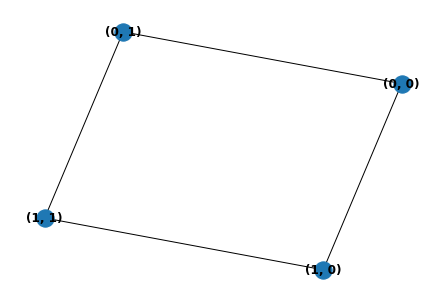

In [3]:
G = grid_graph(dim=(2, 2))
nx.draw(G, with_labels=True, font_weight='bold') 

instance = simulate_CCA(G, [1, 0, 2, 1], 3, 1, 10);
instance

<AxesSubplot:>

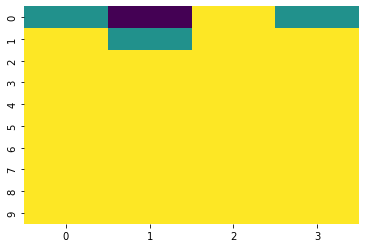

In [4]:
phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')

Synchronized


array([[1., 0., 2., 1.],
       [2., 1., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

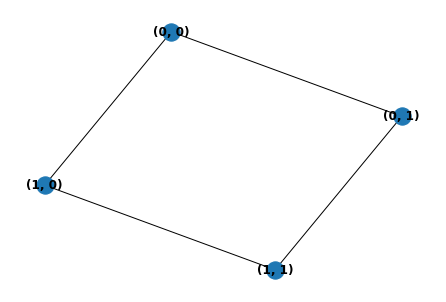

In [15]:
G = grid_graph(dim=(2, 2))
nx.draw(G, with_labels=True, font_weight='bold')

instance = simulate_CCA(G, [1, 0, 2, 1], 4, 1, 10);
instance

<AxesSubplot:>

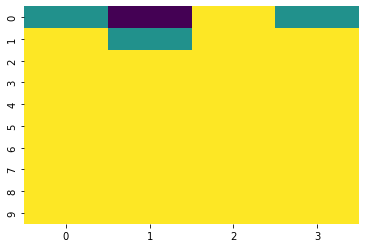

In [6]:
phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')

Non-synchronized


array([[1., 0., 1., 2., 0., 1.],
       [2., 1., 1., 0., 1., 1.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0., 2., 1., 1., 1., 1.],
       [1., 0., 2., 1., 2., 1.],
       [1., 1., 0., 2., 0., 2.],
       [2., 1., 1., 0., 1., 0.],
       [0.

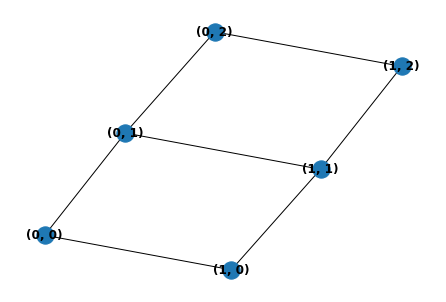

In [7]:
G = grid_graph(dim=(3, 2))
nx.draw(G, with_labels=True, font_weight='bold')

instance = simulate_CCA(G, [1, 0, 1, 2, 0, 1], 3, 1, 100);
instance

<AxesSubplot:>

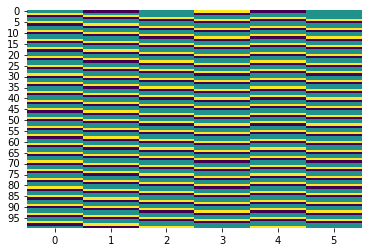

In [8]:
phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')

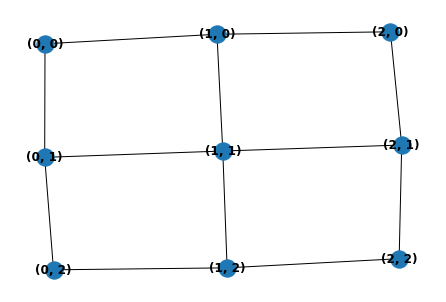

In [9]:
G = grid_graph(dim=(3, 3))
nx.draw(G, with_labels=True, font_weight='bold')

Non-synchronized


<AxesSubplot:>

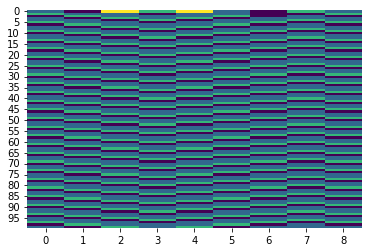

In [10]:
instance = simulate_CCA(G, [1, 0, 3, 2, 3, 1, 0, 2, 1], 3, threshold = 1, iters = 100);
instance

phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')

Non-synchronized


<AxesSubplot:>

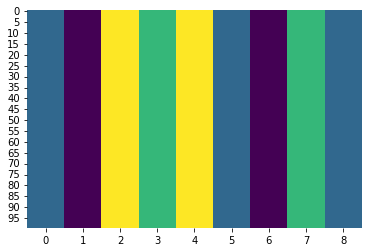

In [11]:
instance = simulate_CCA(G, [1, 0, 3, 2, 3, 1, 0, 2, 1], 3, threshold = 2, iters = 100);
instance

phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')

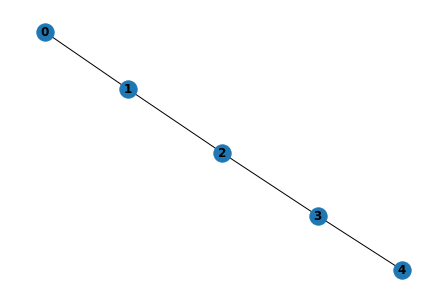

In [12]:
G = grid_graph(dim=(5,))
nx.draw(G, with_labels=True, font_weight='bold')

Non-synchronized


<AxesSubplot:>

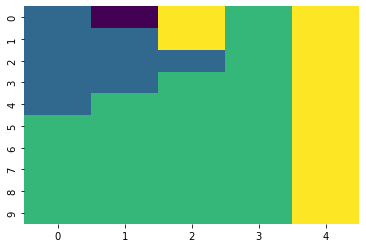

In [13]:
instance = simulate_CCA(G, [1, 0, 3, 2, 3], 3, 1, 10);
instance

phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')

Non-synchronized


<AxesSubplot:>

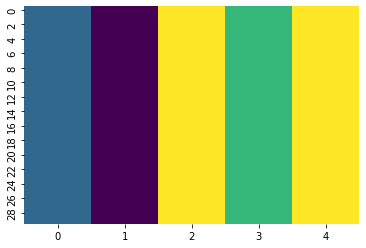

In [14]:
instance = simulate_CCA(G, [1, 0, 3, 2, 3], 3, 2, 30);
instance

phase = pd.DataFrame(instance)
sns.heatmap(phase, cbar=False, cmap='viridis')